In [1]:
import matplotlib.pylab as plt
import numpy as np

In [2]:
def Weight(phi,A=5, phi_o=0,delta=50):
    return 1-np.abs(phi)/delta

def Weight2(phi,A=5, phi_o=0,width=50, n=100):
    return ((n+1.0)/(n-1.0))*(1.0 - n * (np.abs(2.0 * phi/width))**( n - 1.0) + (n - 1.0) * (np.abs(2.0*phi/width))**( n))

def annot_max(x,y, ax=None):
    x=np.array(x)
    y=np.array(y) 
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

def plotweighting(philist, A, delta, phi_o, enumeration,color):
    label=enumeration
    plt.plot(philist,[Weight(phi, A = A, phi_o = phi_o, delta=delta) for phi in philist], label = label,color=color)
    
#def plotweighting(philist, A, delta, phi_o, enumeration,color):
#    label=enumeration
 #   plt.plot(philist,[Weight2(phi, A = A, phi_o = phi_o, width=2*delta) for phi in philist], label = label,color=color)
     

In [3]:
from palettable.scientific.sequential import GrayC_20_r
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

cmapCurve = ListedColormap(GrayC_20_r.mpl_colors[7:])
cmap = LinearSegmentedColormap.from_list("cont",GrayC_20_r.mpl_colors[10:])
#cmap = ListedColormap(GrayC_20_r.mpl_colors[10:])

In [4]:
def PlotLineVariation(delta,A_factor,phi_o_factor,p = 3,**kwargs):
    A = A_factor*p/delta
    phi_o = delta*phi_o_factor
    
    philist=np.arange(-(delta),(delta),.5).tolist()
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    plotweighting(philist, A,  delta, phi_o,"$\omega(\phi,\phi_o,A)$",cmapCurve.colors[0])
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    AnnotatePhi_o = kwargs.get("AnnotatePhi_o",False)
    AnnotateA = kwargs.get("AnnotateA",False)
    if AnnotatePhi_o:
        plt.text(phi_o+0.04*delta,0.3,'$\phi_o={}\delta$'.format(phi_o_factor),rotation=-60,fontsize='small')
    if AnnotateA:
        plt.text(phi_o*1.0-1/(1.5*A),0.75+np.log(A_factor)/15,'$A={}\delta$'.format(A_factor),rotation=-30,fontsize='small',horizontalalignment='center')

def BackgroundNPlotFormat(delta):
    
    philist=np.arange(-(delta),(delta),.5).tolist()
    
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    N = 10000
    X, Y = np.mgrid[-delta:delta:complex(0, N), 0:1:complex(0, 5)]
    Z = np.abs(X) 
    
    plt.pcolormesh(X, Y, Z, cmap=cmap)
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    TitleText = r"$\delta$ = {delta}m".format(delta=delta)
    plt.axvline([delta],c="k",ls=":");plt.axvline([-delta],c="k",ls=":");
    plt.text(delta*(0.97),0.95,TitleText,rotation=90)
    plt.axvline([0],c="k",ls="--");

    

    plt.xlabel("$\phi(x)$")
    plt.grid()
    plt.xticks(np.arange(-delta , delta , 10))
    plt.ylabel("$\omega(\phi,\phi_o,A)$",fontsize='large')
    

    #plt.legend(title=TitleText,loc='lower left')

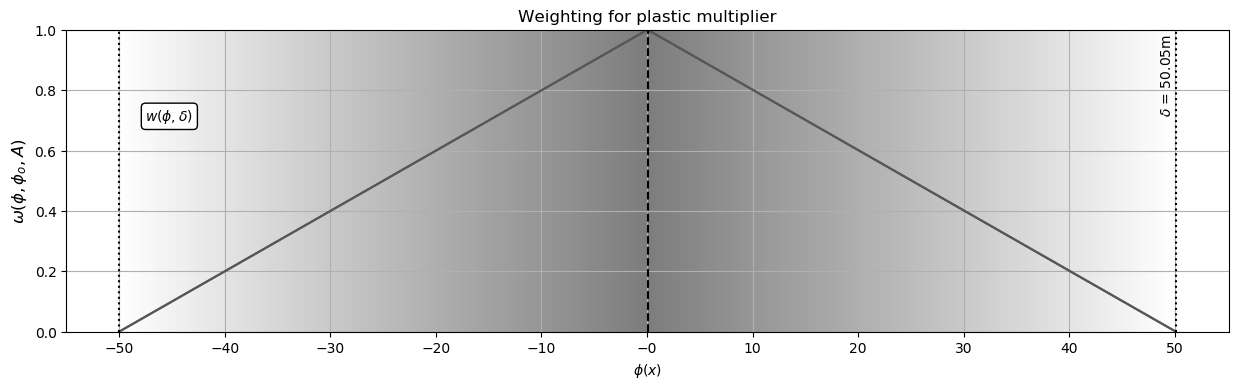

In [5]:
bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
plt.figure(figsize= [15, 4],dpi=100)

delta = 50.05;

PlotLineVariation(delta, A_factor=3, phi_o_factor=0.5, p = 3)
PlotLineVariation(delta, A_factor=2, phi_o_factor=0.5, p = 3)


BoxAnnotation ="""$w(\phi,\delta)$"""
plt.text(-delta*(.95), 0.70, BoxAnnotation, color='black', bbox=bbox)


BackgroundNPlotFormat(delta)
plt.title("Weighting for plastic multiplier")
plt.xlim(-delta-5,delta+5)
plt.show()


In [27]:
def plotweighting(philist, A, delta, phi_o, enumeration,color):
    label=enumeration
    plt.plot(philist,[Weight2(phi, A = A, phi_o = phi_o, width=2*delta, n=50) for phi in philist], label = label,color=color)
  

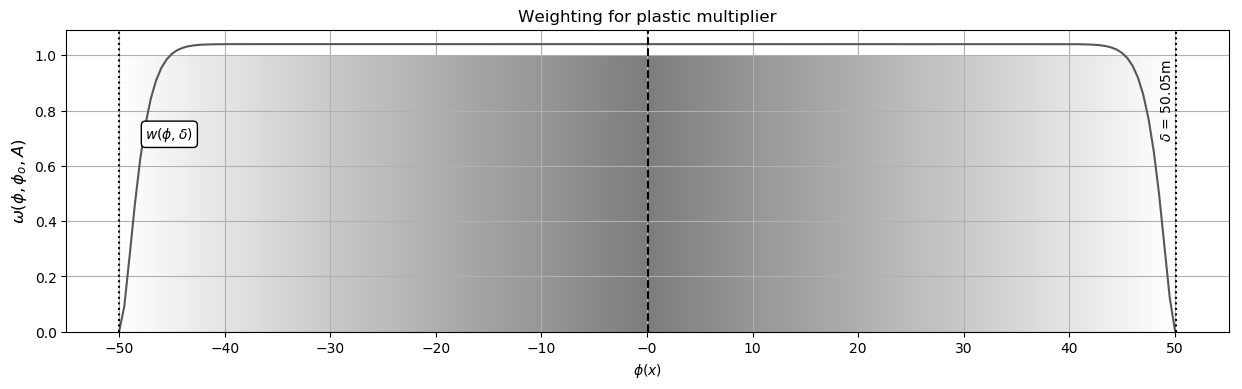

In [28]:
bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
plt.figure(figsize= [15, 4],dpi=100)

delta = 50.05;

PlotLineVariation(delta, A_factor=50, phi_o_factor=0.5)


BoxAnnotation ="""$w(\phi,\delta)$"""
plt.text(-delta*(.95), 0.70, BoxAnnotation, color='black', bbox=bbox)


BackgroundNPlotFormat(delta)
plt.title("Weighting for plastic multiplier")
plt.xlim(-delta-5,delta+5)
plt.show()